In [177]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D



def objective_function(water_input, price):
    yield_term = -0.0038 * (10 + 0.1 * np.sqrt(water_input))**2 + 3.5542 * (10 + 0.1 * np.sqrt(water_input)) - 170.86
    cost_term = (5 + 0.005 * water_input) * water_input**1.1
    return price * yield_term - cost_term

def objective_gradient(water_input, price):
    yield_gradient = price * (-0.0076 * (10 + 0.1 * np.sqrt(water_input)) * 0.1 / (2 * np.sqrt(water_input)) + 3.5542 * 0.1 / (2 * np.sqrt(water_input)))
    cost_gradient = (5 + 0.005 * water_input) * 1.1 * water_input**0.1 + 0.005 * water_input**1.1
    return yield_gradient - cost_gradient

def sgd_optimizer(price, water_available, max_iterations, initial_water_input, initial_step_size, diminishing_rate):
    water_input = initial_water_input
    step_size = initial_step_size
    water_inputs = [water_input]
    objective_values = [objective_function(water_input, price)]
    
    for iteration in range(1, max_iterations):
        # Calculate the gradient
        gradient = objective_gradient(water_input, price)
        
        # Update the water input using SGD for maximization
        new_water_input = water_input + step_size * gradient  # Changed from subtraction to addition
        new_water_input = np.clip(new_water_input, 0, water_available)  # Ensure within feasible region
        
        # Update the step size using diminishing rule
        step_size = initial_step_size / (1 + diminishing_rate * iteration)
        
        # Store the history
        water_inputs.append(new_water_input)
        objective_values.append(objective_function(new_water_input, price))
        
        # Update water input for next iteration
        water_input = new_water_input
    
    return water_input, water_inputs, objective_values

# Set the price and water availability
price = 420
water_available = 1000

# Set the SGD hyperparameters
max_iterations = 10
initial_water_input = 300
initial_step_size = 10
diminishing_rate = 0.01

# Run the SGD optimizer and get the history
optimal_water_input, water_inputs, objective_values = sgd_optimizer(price, water_available, max_iterations, initial_water_input, initial_step_size, diminishing_rate)


print("Optimal Water Input:", optimal_water_input)
print("Optimal Objective Value:", objective_function(optimal_water_input, price))

Optimal Water Input: 61.68661378459146
Optimal Objective Value: -56341.29704198602


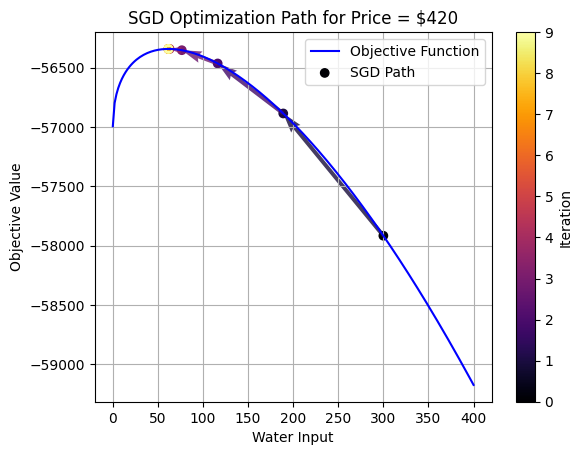

In [176]:
# Plotting with colormap on arrows
fig, ax = plt.subplots()

# Define colormap
cmap = plt.get_cmap('inferno')

# Plot the objective function across a range of water inputs
water_input_range = np.linspace(0, water_available, 200)
objective_values_range = [objective_function(w, price) for w in water_input_range]
ax.plot(water_input_range, objective_values_range, label='Objective Function', color='blue')

# Plot the SGD path using scatter for points
sc = ax.scatter(water_inputs, objective_values, c=range(len(water_inputs)), cmap=cmap, label='SGD Path')

# Add color bar
plt.colorbar(sc, ax=ax, label='Iteration')

# Plot arrows with colors changing gradually
for i in range(1, len(water_inputs)):
    ax.quiver(water_inputs[i-1], objective_values[i-1], water_inputs[i] - water_inputs[i-1], objective_values[i] - objective_values[i-1], 
              color=cmap(float(i)/len(water_inputs)), scale_units='xy', angles='xy', scale=1, width=0.01, alpha=0.8)

ax.set_xlabel('Water Input')
ax.set_ylabel('Objective Value')
ax.legend()
ax.grid(True)
ax.set_title(f'SGD Optimization Path for Price = ${price}')


plt.show()

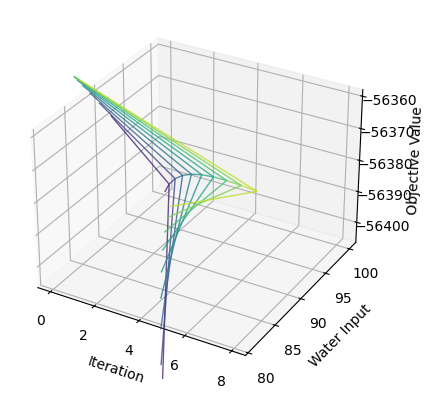

In [118]:
# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
iterations = list(range(max_iterations))

# Plot arrows
cmap = plt.get_cmap('viridis')  # You can choose any available colormap, like 'plasma', 'inferno', 'magma', 'cividis'


# Plot arrows with colors changing gradually
for i in range(1, len(water_inputs)):
    color = cmap(float(i)/len(water_inputs))  # Normalize the color to the number of iterations
    ax.quiver(iterations[i-1], water_inputs[i-1], objective_values[i-1],
              iterations[i] - iterations[i-1], water_inputs[i] - water_inputs[i-1], objective_values[i] - objective_values[i-1],
              color=color, arrow_length_ratio=10, linewidth=1, alpha=0.8)




ax.set_xlabel('Iteration')
ax.set_ylabel('Water Input')
ax.set_zlabel('Objective Value')

# Enhance visibility
ax.set_facecolor('white')  # Set background to white for better contrast
ax.grid(True)  # Enable grid for better orientation

plt.show()